# Test for  **load_data()**

load_data() is a generic data loader in pyspch  
- it reads many different types of data: wav-files, segmentations, data files, ...
- it can read from the pkg_resources directory, other local files or URL
- load_data() may need to make well informed guesses on basis of file extensions as to which datatype it is reading; this procedure is not waterproof

underlying are a number of data specific loading modules,
such as read_data_file(), read_data_frame(), audio.load()

**Dates:**   
27/09/2022: v0.7    
31/10/2023: v0.8.0    
17/01/2024: v0.8.2  after changes to the pyspch/data setup  ; data is now structured into subdirs   
Last verification: v0.8.2, python3.10 on win11   
10/01/2025: v0.8.3


In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline

import math,time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from IPython.display import display, Audio
import librosa as librosa
    
import pyspch.sp as Sps
import pyspch.display as Spd
import pyspch.core as Spch

In [3]:
#help(Spch.load_data)

In [4]:
# load_data() works with files on remote resouces, local resources, or the within package distributed data
# directory that is accessed with root=None
name = "demo/friendly.wrd"
for root in ['https://homes.esat.kuleuven.be/~spchlab/data/',None]:
    filename = Spch.get_full_filename(name,root=root)
    print(filename)
    print(Spch.load_data(name,root=root))

https://homes.esat.kuleuven.be/~spchlab/data/demo/friendly.wrd
     t0    t1        seg
0  0.01  0.44   friendly
1  0.49  1.04  computers
c:\users\compi\onedrive - ku leuven\python\pyspch\pyspch\data\demo\friendly.wrd
     t0    t1        seg
0  0.01  0.44   friendly
1  0.49  1.04  computers


In [5]:
Spch.load_data("lexlm/lexicon1.txt")

['a       ah',
 'alternative ao l t er n ah t ih v',
 'appreciated  ah p r iy sh iy ey t ih d',
 'an      ah n',
 'are     aa r',
 'at      ae t',
 'bad     b ae d',
 'be      b iy',
 'beach   b iy ch',
 'beed    b iy d',
 'better  b eh t er',
 'bricks  b r ih k s',
 'booed   b uw d',
 'by      b ay',
 'can     k ah n',
 'circumspect s er k ah m s p eh k t',
 'clear    k l iy r',
 'computer  k ah m p y uw t er',
 'computers k ah m p y uw t er z',
 'done    d ah n',
 'dive    d ay v',
 'eight   ey t',
 "everyone's  eh v r iy w ah n z",
 'expansionist  ih k s p ae n sh ah n ih s t',
 'expansionist_1  ih k s p ae n ch ah n ih s t',
 'fingertips f ih ng g er t ih p s',
 'for     f ao r',
 'four    f ao r',
 'five    f ay v',
 'foolish f uw l iy sh',
 'friendly  f r eh n d l iy',
 'how     hh aw',
 'human   hh y uw m ah n',
 'in      ih n',
 'it      ih t',
 'misinterpret m ih s ih n t er p r ah t',
 'nice    n ay s',
 'nine    n ay n',
 'now     n aw',
 'oh      ow',
 'one     w ah n',
 'p

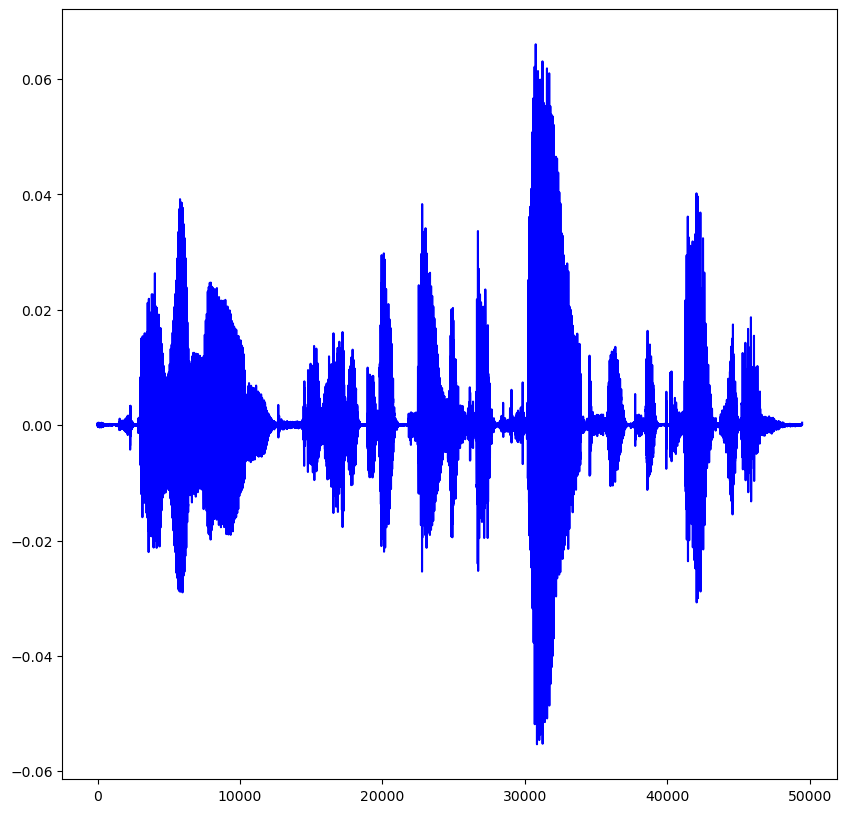

In [6]:
#wavdata, sample_rate = Spch.load_data('friendly.wav')
wavdata, sample_rate = Spch.load_data('audio/train/dr1/fcjf0/si1027.wav',root = 'https://homes.esat.kuleuven.be/~spchlab/data/timit/')
plt.plot(wavdata)
# if you prefer the plot above the audio widget, then flush the plot by adding the line below
# plt.show()
display(Audio(data=wavdata,rate=sample_rate,autoplay=False))

In [7]:
seg = Spch.load_data('friendly.gra')
seg= Spch.load_data('audio/train/dr1/fcjf0/si1027.phn',root = 'https://homes.esat.kuleuven.be/~spchlab/data/timit/',xlat='timit61_41')
seg

,t0,t1,seg
0,0,2994,sil
1,2994,4440,iy
2,4440,5080,v
3,5080,6266,ih
4,6266,7436,n
5,7436,10360,eh
6,10360,12338,n
7,12338,14920,sil
8,14920,15720,ih
9,15720,16041,f


In [8]:
name="conf/phones-61-48-39-41.txt"
root='https://homes.esat.kuleuven.be/~spchlab/data/timit/'
Spch.load_data(name,root=root,sep='\t')

,0,1,2,3
0,aa,aa,aa,aa
1,ae,ae,ae,ae
2,ah,ah,ah,ah
3,ao,ao,aa,ao
4,aw,aw,aw,aw
...,...,...,...,...
56,v,v,v,v
57,w,w,w,w
58,y,y,y,y
59,z,z,z,z


In [9]:
# a small example script to convert TIMIT segmentations in samples and TIMIT61
# to segmentations in seconds and CMU symbols
suffix = ".phn"
dir = "https://homes.esat.kuleuven.be/~spchlab/data/timit/segmentation/"
ifname = "train/dr2/marc0/sa2"
ofname = "timit_m1_sa2"
seg = Spch.load_data(ifname+suffix,dt=1./16000.,root=dir,xlat="timit61_cmu")
Spch.timit.write_seg_file(ofname+suffix,seg)
seg

,t0,t1,seg
0,0.000000,0.133125,sil
1,0.133125,0.152500,d
2,0.152500,0.237563,ow
3,0.237563,0.256375,n
4,0.256375,0.397500,ae
5,0.397500,0.467313,s
6,0.467313,0.504437,sil
7,0.504437,0.524750,m
8,0.524750,0.573313,ih
9,0.573313,0.586812,t


In [10]:
# this loads the full hillenbrand data
hildata = Spch.load_data('hillenbrand/hildata.csv')  
print(hildata)
# this is a shortcut to just load the main fields
hildata = Spch.load_data('hillenbrand') 
print(hildata)

        fid vid gid  sid    dur     f0     F1      F2      F3      F4  ...  \
0     m01ae  ae   m  m01  323.0  174.0  663.0  2012.0  2659.0  3691.0  ...   
1     m02ae  ae   m  m02  250.0  102.0  628.0  1871.0  2477.0  3489.0  ...   
2     m03ae  ae   m  m03  344.0   99.0  605.0  1812.0  2570.0     NaN  ...   
3     m04ae  ae   m  m04  312.0  124.0  627.0  1910.0  2488.0  3463.0  ...   
4     m06ae  ae   m  m06  254.0  115.0  647.0  1864.0  2561.0  3506.0  ...   
...     ...  ..  ..  ...    ...    ...    ...     ...     ...     ...  ...   
1663  g17uw  uw   g  g17  245.0  236.0  490.0  2179.0  3131.0  4420.0  ...   
1664  g18uw  uw   g  g18  315.0  214.0  435.0  1829.0  3316.0  4536.0  ...   
1665  g19uw  uw   g  g19  192.0  243.0  497.0  1334.0  3067.0  3928.0  ...   
1666  g20uw  uw   g  g20  248.0  248.0  498.0  1740.0  3291.0  4500.0  ...   
1667  g21uw  uw   g  g21  227.0  225.0  446.0  1533.0  3269.0  4504.0  ...   

       F1-2    F2-2    F3-2   F1-3    F2-3    F3-3  Start    En

In [11]:
corpus = Spch.load_data('lexlm/mini_corpus.lst')
corpus

['friendly      0.0   -1.  friendly computers',
 'beed          0.0   -1.  beed bad booed',
 'f1            0.1  1.30  misinterpret',
 'f1            1.3  2.7  expansionist',
 'f1            2.80 3.7  circumspect']

In [12]:
tinytimit = 'https://homes.esat.kuleuven.be/~spchlab/data/timit/features/tinytimit/'
#data_mf = load_data('male-female',ext='mat',dir=tinytimit)
data = Spch.load_data('a-i-uw-800.mat',root=tinytimit)
data['ALLtrain']

array([[32.077057, 29.715202, 30.210922, ..., 34.934364, 37.345524,
        37.34706 ],
       [42.221165, 42.610954, 37.769604, ..., 39.187294, 44.425858,
        44.699024],
       [45.728718, 39.039433, 42.510815, ..., 43.447376, 47.911297,
        56.283157],
       ...,
       [29.333326, 38.898354, 27.664291, ..., 21.688843, 39.738323,
        34.04147 ],
       [38.547478, 28.862505, 31.244888, ..., 24.435158, 41.30451 ,
        29.312754],
       [38.777184, 30.15622 , 30.376719, ..., 29.830904, 50.633377,
        44.831753]], dtype=float32)

In [13]:
df = pd.DataFrame(data['ALLtrain'].T)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,32.077057,42.221165,45.728718,50.495625,61.731491,67.322289,69.732407,63.898064,60.767139,62.523918,...,56.351425,53.387833,50.011082,50.967175,46.816109,37.261189,29.277334,29.333326,38.547478,38.777184
1,29.715202,42.610954,39.039433,55.182594,51.178818,55.868599,52.817757,57.075996,54.782452,41.745510,...,24.991703,29.015858,35.863815,37.291981,30.666170,42.583603,42.134357,38.898354,28.862505,30.156219
2,30.210922,37.769604,42.510815,49.132050,56.968365,61.368484,60.962959,59.069069,59.326626,62.657581,...,51.380608,45.742397,42.102856,42.549862,33.152367,23.510319,28.441895,27.664291,31.244888,30.376719
3,26.235712,33.540375,37.465965,42.615582,43.262787,48.732338,54.346699,56.709419,58.572128,61.422005,...,37.563084,35.139992,42.816353,41.900368,36.140663,37.035606,33.766281,34.720596,29.811773,32.452950
4,33.634087,38.889511,48.259117,49.934238,55.217278,54.217545,65.779701,62.575191,64.816727,55.949471,...,60.538383,50.956989,52.252716,48.348061,49.343700,56.691086,55.306660,49.474812,36.193546,25.310297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,28.297749,36.332222,40.196198,47.335968,41.798714,36.755093,35.799427,34.287670,37.823242,39.489788,...,27.576248,36.311607,41.724659,37.139725,44.035194,35.151699,22.112144,25.058701,28.167551,34.216038
2396,28.040585,43.339558,37.458519,48.351357,45.776161,45.279015,45.704494,38.968040,42.509506,31.360119,...,38.188789,47.958908,48.099426,49.941219,49.367607,52.642803,48.137077,35.022133,27.739723,24.235390
2397,34.934364,39.187294,43.447376,52.716007,44.636780,32.265465,38.201302,33.165138,34.681576,39.909992,...,26.893377,34.964973,27.722540,26.283127,26.871853,26.400366,23.114368,21.688843,24.435158,29.830904
2398,37.345524,44.425858,47.911297,53.356091,51.047634,48.422150,47.861401,43.188396,43.968422,41.881828,...,49.926064,56.324940,54.247963,58.207058,55.925106,45.119873,41.926743,39.738323,41.304508,50.633377


In [14]:
Spch.load_data('hillenbrand')

,gender,vowel,f0,F1,F2,F3
fid,,,,,,
m01ae,m,ae,174.0,663.0,2012.0,2659.0
m02ae,m,ae,102.0,628.0,1871.0,2477.0
m03ae,m,ae,99.0,605.0,1812.0,2570.0
m04ae,m,ae,124.0,627.0,1910.0,2488.0
m06ae,m,ae,115.0,647.0,1864.0,2561.0
...,...,...,...,...,...,...
g17uw,g,uw,236.0,490.0,2179.0,3131.0
g18uw,g,uw,214.0,435.0,1829.0,3316.0
g19uw,g,uw,243.0,497.0,1334.0,3067.0


## File Objects

pyspch provides generic (read) access to files (locally, mounted, via URL) via
- open_fobj(): opens any file like objects
- read_fobj(): reads data from any file like object in a FILE IO object in raw format
- read_data_file(): reads text data from any file like object (default=list of lines)
- read_tsv_file(): reads a TAB separated data file
- load(): loads audio from any file like object

### Example 1: read local file into list of lines using native Python

In [15]:
fname = 'mini_corpus.lst'
dir = '../pyspch/data/lexlm/'
f = open(dir+fname)
f.read().splitlines()

['friendly      0.0   -1.  friendly computers',
 'beed          0.0   -1.  beed bad booed',
 'f1            0.1  1.30  misinterpret ',
 'f1            1.3  2.7  expansionist ',
 'f1            2.80 3.7  circumspect']

### Example 2: read_data_file() to read local or remote files

- Reads local or remote files into list of lines
- optionally splits each line on whitespace in a max of maxcols+1

In [16]:
fname = 'mini_corpus.lst'
dir = '../pyspch/data/lexlm/'
dir ='HTTPS://homes.esat.kuleuven.be/~spchlab/data/misc/'
#
data_split = Spch.read_data_file(dir+fname,maxcols=3)
data = Spch.read_data_file(dir+fname)
data, data_split

(['friendly      0.0   -1.  friendly computers',
  'beed          0.0   -1.  beed bad booed',
  'f1            0.1  1.30  misinterpret',
  'f1            1.3  2.7  expansionist',
  'f1            2.80 3.7  circumspect'],
 [['friendly', '0.0', '-1.', 'friendly computers'],
  ['beed', '0.0', '-1.', 'beed bad booed'],
  ['f1', '0.1', '1.30', 'misinterpret'],
  ['f1', '1.3', '2.7', 'expansionist'],
  ['f1', '2.80', '3.7', 'circumspect']])

### Example 3: read_dataframe() to read column oriented files

- Reads local or remote files into a DataFrame
- is a wrapper around pd.read_csv() with useful presets and options
    + assumes no header
    + tab delimited by default, but can handle any sep
    + strip=True strips white space at edges from a string datafield 
    + does a reasonable automatic data type casting
    + ...

In [17]:
fname = 'mini_corpus.txt'
dir = '../pyspch/data/lexlm/'
dir ='HTTPS://homes.esat.kuleuven.be/~spchlab/data/misc/'
corpus = Spch.read_dataframe(dir+fname,names=['file','t0','t1','text'],strip=True)
corpus.dtypes, corpus

(file     object
 t0      float64
 t1      float64
 text     object
 dtype: object,
        file   t0   t1                text
 0  friendly  0.0 -1.0  friendly computers
 1      beed  0.0 -1.0      beed bad booed
 2        f1  0.1  1.3        misinterpret
 3        f1  1.3  2.7        expansionist
 4        f1  2.8  3.7         circumspect)

In [18]:
# read a segmentation datafile
dir='https://homes.esat.kuleuven.be/~spchlab/data/timit/'
file = "segmentation/train/dr1/fcjf0/si1027"
# get segmentations
segwrd = Spch.read_dataframe(dir+file+ ".wrd",names=['t0','t1','seg'],sep='\s+')
print(segwrd.dtypes)
segwrd

t0      int64
t1      int64
seg    object
dtype: object


,t0,t1,seg
0,1513,7436,even
1,7436,12338,then
2,12338,16041,if
3,16041,18300,she
4,18300,22500,took
5,22500,24522,one
6,24522,28120,step
7,28120,34882,forward
8,34882,36920,he
9,36920,39160,could


### Reading TIMIT transcriptions files

In [19]:
fn1 = 'misc/timitx/sa1.txt'
#fn1="timit/phones-61-48-39-41.txt"
dir='https://homes.esat.kuleuven.be/~spchlab/data/'
transcript = Spch.read_data_file(dir+fn1)[0].strip().split(None,2)
print('Samples: ',int(transcript[0]),int(transcript[1]))
print('Transcript: ',transcript[2].strip('.,!?:;'))

Samples:  0 46797
Transcript:  She had your dark suit in greasy wash water all year


### Reading Mapping files and converting to dictionary

In [20]:
fn1="timit/conf/phones-61-48-39-41.txt"
fname='https://homes.esat.kuleuven.be/~spchlab/data/'
transcript = Spch.read_data_file(fname+fn1)
cols = Spch.read_data_file(fname+fn1, maxcols = 4)
dict(zip(cols[0],cols[3]))

{'aa': 'ao'}

## (TIMIT) Segmentation Files

Segmentation Files are assumed to be in the format

t0  t1   seg    
....


#### time units
t0, t1 are begin and end-times of segment 'seg'
the units of time, can be specified in the read_seg_file() module with 'dt', by default segmentation times are given in seconds;
in timit it is often in samples (with SR=16000), thus use dt=1/16000

#### phonetic symbols
Phonetic transcriptions come in a variety of phonetic symbol sets.
These utilities include default definitions (and orderings) of **TIMIT48** and **TIMIT41**.   TIMIT48 is the default used in experiments with TIMIT.   TIMIT41 is our own more compact version inspired by the alphabet in the CMU dictionaries, with 1 additional closure ('cl') symbol.

A number of mappings between the different alphabets are foreseen.  To apply them use the field 'xlat' at time of reading and specify the desired translation:  timit61_48, timit61_41, ..
These are simple dictionary based mappings.   

In [21]:
# read a datafile
dir='https://homes.esat.kuleuven.be/~spchlab/data/'
file = "misc/timitx/si1027" #@param {type:"string"}
wavfile = dir+file+".wav" 
wavdata, sr = Spch.audio.load(wavfile)
spg1 = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=None)

# get segmentations
segwrd = Spch.timit.read_seg_file(dir+file+ ".wrd",dt=1/sr,fmt='float32')
segphn61 = Spch.timit.read_seg_file(dir+file+ ".phn",dt=1/sr,fmt='float32')
segphn = Spch.timit.read_seg_file(dir+file+ ".phn",dt=1/sr,fmt='float32',xlat='timit61_41')

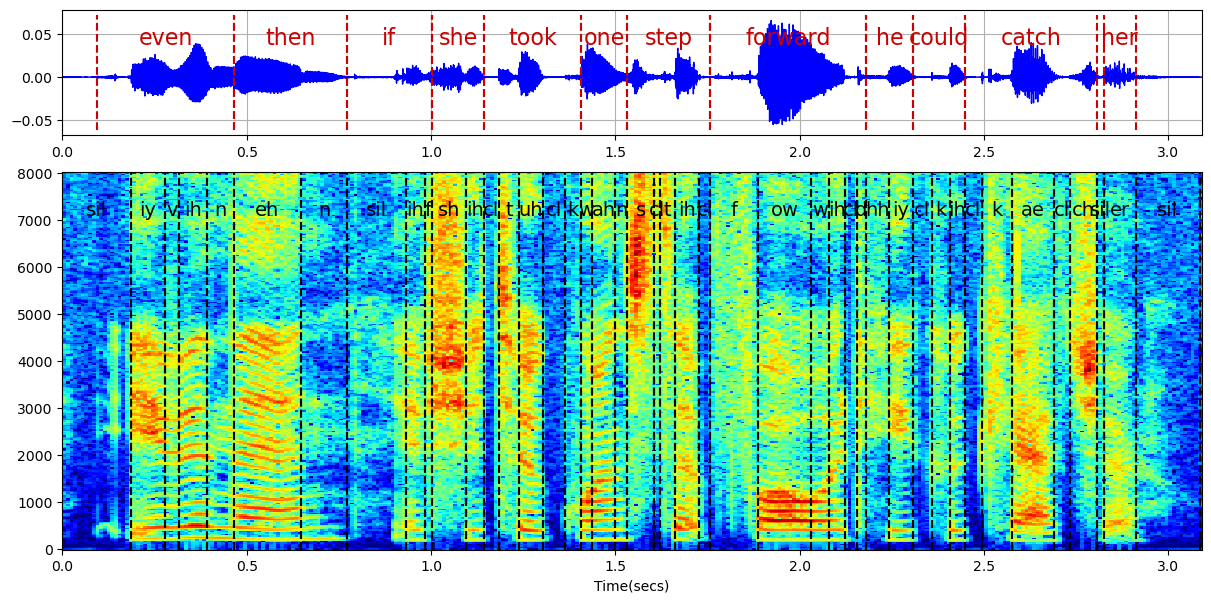

In [22]:
fig = Spd.PlotSpg(spg1,wavdata=wavdata,segwav=segwrd,segspg=segphn,sample_rate=sr)
display(fig)
display(Audio(data=wavdata,rate=sr))